<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/9%EC%A3%BC%EC%B0%A8/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
# 1. 데이터 로드

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [20]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
# 3. 시퀀스 생성 (X, y 분리)
window = 12  # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])
X, y = np.array(X), np.array(y)

In [22]:
# 4. Train / Test 데이터 분리
split_point = int(len(X) * 0.8)  # 80%를 학습용으로 사용

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [23]:
print(f"Total sequences: {len(X)}")
print(f"Train sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")

Total sequences: 313
Train sequences: 250
Test sequences: 63


In [24]:
# -------------------------------------------------------------------
# 5. 모델 1: SimpleRNN
# -------------------------------------------------------------------
model_rnn = tf.keras.Sequential([
    # 원본 코드에 있던 2개의 RNN 레이어를 사용합니다.
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse')

print("\n--- 1. SimpleRNN 모델 학습 시작 ---")
model_rnn.fit(X_train, y_train, epochs=50, batch_size=8,
              validation_data=(X_test, y_test),
              verbose=1) # verbose=1로 학습 과정 표시


--- 1. SimpleRNN 모델 학습 시작 ---
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0539 - val_loss: 0.0200
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - val_loss: 0.0309
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023 - val_loss: 0.0150
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss: 0.0178
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 0.0303
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0240
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 0.0242
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0085
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0098
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5030e-04 - val_loss: 0.0074
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0116
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4549e-04 - val

In [25]:
# -------------------------------------------------------------------
# 6. 모델 2: LSTM
# -------------------------------------------------------------------
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

print("\n--- 2. LSTM 모델 학습 시작 ---")
model_lstm.fit(X_train, y_train, epochs=50, batch_size=8,
               validation_data=(X_test, y_test),
               verbose=1) # verbose=1로 학습 과정 표시


--- 2. LSTM 모델 학습 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0530 - val_loss: 0.0235
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0147
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - val_loss: 0.0171
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0141
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - val_loss: 0.0140
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.0143
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0166
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - val_loss: 0.0140
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0137
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0146
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0141
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

In [26]:
# -------------------------------------------------------------------
# 7. 두 모델의 예측 수행 (Test 데이터 사용)
# -------------------------------------------------------------------
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


In [27]:
# 8. MSE / RMSE 계산 (성능 비교)
# 8-1. 정규화된 값 스케일 복원
y_test_inv = scaler.inverse_transform(y_test)
pred_rnn_inv = scaler.inverse_transform(pred_rnn)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)

In [28]:
# 8-2. 원본 스케일 MSE 계산
mse_rnn = mean_squared_error(y_test_inv, pred_rnn_inv)
mse_lstm = mean_squared_error(y_test_inv, pred_lstm_inv)

In [29]:
# 8-3. 원본 스케일 RMSE 계산 (RMSE가 더 직관적임)
rmse_rnn = np.sqrt(mse_rnn)
rmse_lstm = np.sqrt(mse_lstm)

In [30]:
print("\n--- 3. 최종 모델 성능 비교 (Test Set) ---")
print(f"SimpleRNN - MSE: {mse_rnn:,.2f} / RMSE: {rmse_rnn:,.2f}")
print(f"LSTM      - MSE: {mse_lstm:,.2f} / RMSE: {rmse_lstm:,.2f}")


--- 3. 최종 모델 성능 비교 (Test Set) ---
SimpleRNN - MSE: 1,018,283.82 / RMSE: 1,009.10
LSTM      - MSE: 1,439,966.96 / RMSE: 1,199.99


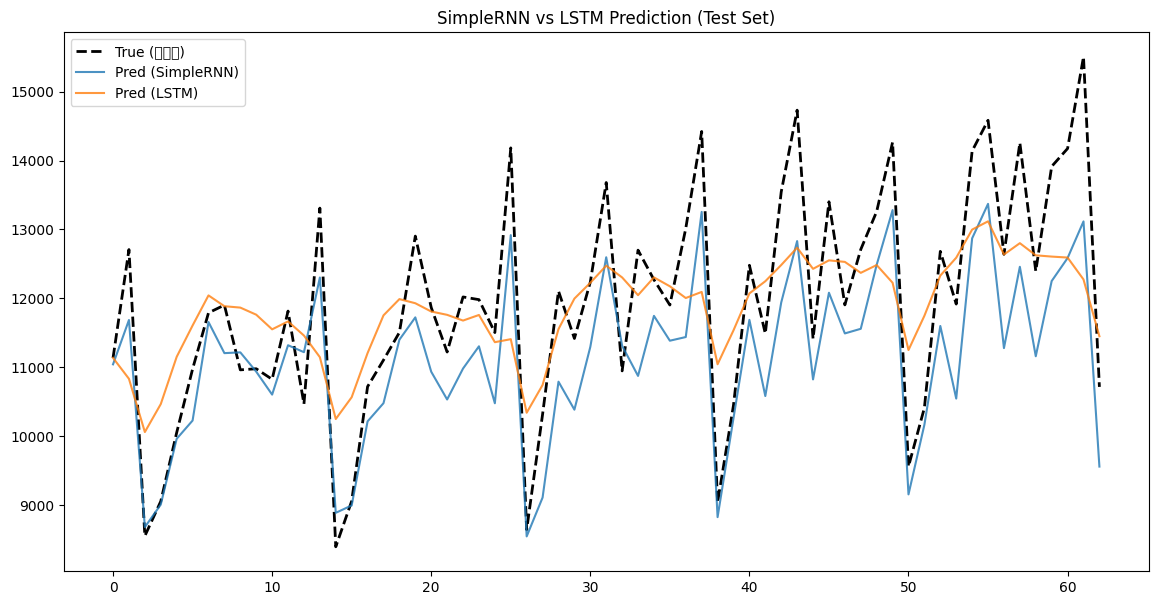

In [32]:
# 9. 시각화 (두 모델 비교)
plt.figure(figsize=(14, 7))
plt.title('SimpleRNN vs LSTM Prediction (Test Set)')
plt.plot(y_test_inv, label='True (실제값)', color='black', linestyle='--', linewidth=2)
plt.plot(pred_rnn_inv, label='Pred (SimpleRNN)', alpha=0.8)
plt.plot(pred_lstm_inv, label='Pred (LSTM)', alpha=0.8)
plt.legend()
plt.show()